# Assignment 2: System Identification

In this assignment you are presented with a number of 'black box' components, each of which contain code that models a certain electronic system. By investigating the response of each box to generated input (voltage) signals, you will be able to determine the type of system each box contain and estimate its parameters (e.g. resistance and inductance).
Before you continue with this assignment, please read `Yr2_Computing_System_Identification.pdf` and work though the example notebook `black_box_example.ipynb` first.

As before, you must store your student ID in the variable studentID and execute the cell below before starting the assignment. This will import the necessary Boxes objects. As in assignment 1, the final cell contains a function call (`Boxes.check()`) which you should run to check that the naming of variables and functions in each task is correct.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Do not alter any of the code within this cell other than 
# the value of studentID
from module_engine.assignment import Boxes
studentID = 1764303    # Enter your student ID here

# Creating Box objects to be investigated in this assignment
t1_box1, t1_box2, t1_box3, t2_box, t3_box = Boxes.get_boxes(studentID)

Student ID found. Continue.

Student ID found. Continue.

Student ID found. Continue.

Student ID found. Continue.

Student ID found. Continue.



## Task 1
#### Marks available:  4

Each of the following circuits is contained in *one* of the boxes `t1_box1`, `t1_box2` and `t1_box3`:
- RL high pass filter
- RC low pass filter
- RLC band pass filter

By analysing the action of each box on custom signals and employing the `.fft` and `.fftfreq` functions from `numpy.fft`, identify the type of circuit contained in each box. A blank cell has been provided for your working, but you are free to insert as many additional cells as you require. 

After completing your investigation set the variables `RL_circuit`, `RC_circuit` and `RLC_circuit` in the next cell to a value of 1, 2 or 3 to indicate which box matches the relevant circuit. For example, write `RC_circuit = 1` if you believe `t1_box1` to be the RC low pass filter or
`RC_circuit = 2` if you believe that system is in `t1_box2`.

**Reminder**:
Use the `.process()` method to interact with the Boxes objects, as demonstrated in `black_box_example.ipynb`

**Hint**:
In order to obtain an informative result, your time domain input signal should contain frequency components ranging from 10 to 4000 Hz.

In [9]:
# Working for Task 1 (you are free to insert additional 
# cells above/below this one if desired)

def swept_sine(f1, f2, t):
    """ 
    create a sine wave with a frequency sweeping between f1 and f2
    f1: start frequency [Hz]
    f2: stop frequency [Hz]
    t: np.array of linearly spaced points in time [s]
    """
    f = np.linspace(f1,f2,t.size)
    output = np.sin(2*np.pi*f*t)
    return output

def get_time_array(N=1000, duration=10, endpoint=False):
    # N: Number of sample points
    # duration: end point of the open interval
    
    t = np.linspace(0, duration, num=N, endpoint=endpoint) 
    total_time = t[-1]-t[0] # different from duration!!
    timestep = total_time/(N-1) 
    print("Data points = {}".format(N))
    print("Total time = {} s".format(total_time))
    print("Timestep = {} s".format(timestep))
    print("Sampling Frequency = {} Hz".format((1/timestep)))
    
    return t

# generate time array
t = get_time_array(N=100000, duration = 10.0)

# generate array containing input signal (voltage) 
s_in = swept_sine(10, 4000,t)

Data points = 100000
Total time = 9.9999 s
Timestep = 0.0001 s
Sampling Frequency = 10000.0 Hz


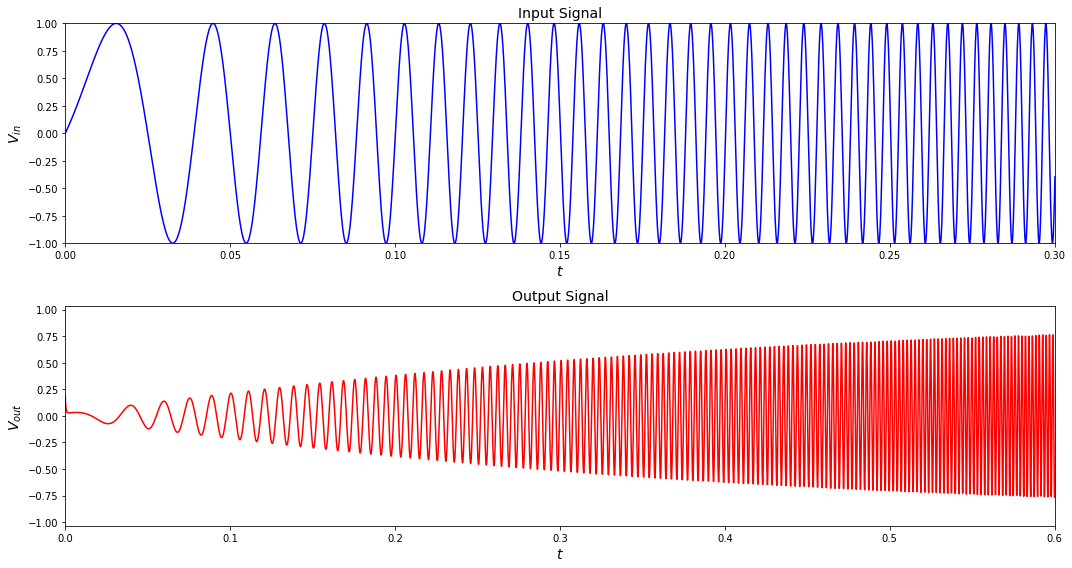

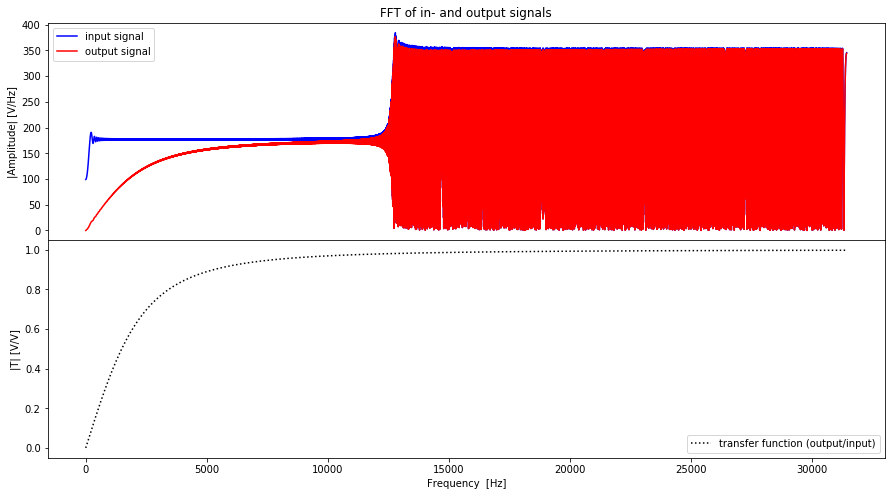

In [10]:
s_out = t1_box2.process(t, s_in)

# Plot the result, comparing input to output
fig = plt.figure(figsize=(15,8))
# Plot input voltage as a function of time
plt.subplot(211)
plt.plot(t, s_in, 'b-')
plt.title('Input Signal', fontsize=14) 
plt.xlabel(r'$t$', fontsize=14) 
plt.ylabel(r'$V_{in}$', fontsize=14)
plt.axis([0, 0.3, np.amin(s_in), np.amax(s_in)])

# Plot output voltage as a function of time
plt.subplot(212)
plt.plot(t, s_out, 'r-')
plt.title('Output Signal', fontsize=14)
plt.xlabel(r'$t$', fontsize=14) 
plt.ylabel(r'$V_{out}$', fontsize=14) 
plt.axis([0, 0.6, np.amin(s_out), np.amax(s_out)])

# Automatically adjust subplots to fit figure area
plt.tight_layout()
# Display plots
plt.show()


# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

# Next we generate sample points in the frequency domain,
# for this we need to know the duration and time step
# of the time array.
def get_frequency_array(t):
    N = len(t)
    timestep = np.diff(t)[0]
    f = np.fft.fftfreq(N, d=timestep)
    return f

f = get_frequency_array(t)

# We only want to plot the positive frequencies from the FFT
# this means we can ignore half of each array.
# Check the numpy.fftfreq documentation to see that 
# frequencies are arranged as follows:
# f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)  if n is even
# so we are interested in the elements f[1:n/2].
def get_positive_frequencies(A):
    N=len(A)
    if len(A)//2==0:
        N2=int(N/2)
    else:
        N2=int((N+1)/2)
    return A[1:N2]

f = 2*np.pi*get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)

# Creating some custom subplots
fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

# Plot the absolute values of transformed_output 
ax[0].plot(f, np.abs(S_in), 'b-', label='input signal') 
ax[0].plot(f, np.abs(S_out), 'r-', label='output signal')
ax[0].legend()

ax[1].plot(f, np.abs(S_out/S_in), 'k:', label='transfer function (output/input)')
ax[1].set_xlabel('Frequency  [Hz]')
ax[1].set_ylabel('|T| [V/V]')
ax[1].legend()

ax[0].set_title('FFT of in- and output signals')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other 
# and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()

In [11]:
# Now, assign each of these variables a (unique) value 
# of 1, 2 or 3. For example if you know that t1_box2
# contains the RC_circuit, set RC_circuit=2, if instead
# you found the RC_circuit in Box t1_box1, set RC_circuit=1. 
RL_circuit = 2
RC_circuit = 3
RLC_circuit = 1

## Task 2
#### Marks available:  3
You are to work with `t2_box` in this task (defined in the first cell of the notebook). It is known that this box contains an **RL high pass** filter circuit, but with parameter values **different** from those of the RL high pass circuit in Task 1. 

Employing a similar method to that used in Task 1, examine the characteristic transfer function of this circuit to determine an approximate value for the associated corner frequency, $f_0$. This corresponds to the frequency $f_0$ such that $|T(f_0)| =\sqrt{1/2}$. 

The examples in `Yr2_Computing_System_Identification.pdf` refer to $T(\omega)$ while we sometimes use $T(f)$. These are the same function just plotted over a different axis ($\omega = 2\pi f$). It is easy to make mistakes when applying this scaling. You should always check if you are using the right frequency scaling for a given task.

After you complete you investigation store the value for f_0 in the variable `corner_frequency`. During marking, your value will be compared to the true value with a tolerance of 10 Hz. Ensure that your sample density in the frequency domain is sufficient to achieve this level of accuracy.

Furthermore, assuming that the resistance R of the circuit is 200 Ohms, calculate the inductance of the inductor in Henrys and store this in the variable `inductance`. Do **not** round this value.

**Hints**:
  * Your time domain input signal should contain frequency components ranging from 10 to 3000 Hz in order to obtain an informative result. 
  * For finding a specific value in a numpy array you may want to use the `numpy.argmin` function. 
  Play with and understand the following code:
  ```
  a=np.array([10, 11, 12, 15, 20, 30])
  index=np.argmin(np.abs(a-15))
  print(index)
  print(a[index])
  ```
  * To visually check whether you found the corner frequency correctly you can plot additional lines into the graph with the transfer fucntion, for example using `plt.axvline(x=f0)` and `plt.axhline(y=1/np.sqrt(2),linestyle='--')`.

4098
Data points = 100000
Total time = 9.9999 s
Timestep = 0.0001 s
Sampling Frequency = 10000.0 Hz


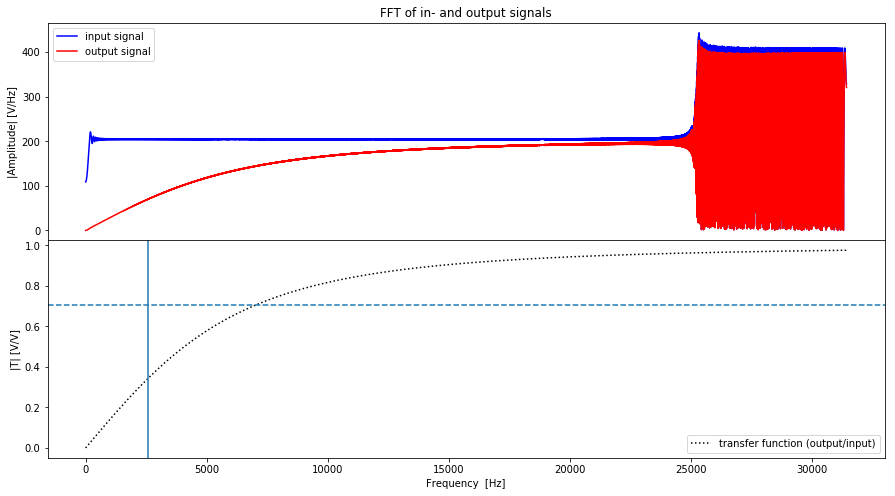

In [12]:
# Define parameters for Task 2 - explore frequencies up to 3000Hz

a = np.abs(S_out/S_in)
index = np.argmin(np.abs(a - np.sqrt(0.5)))
print(index)

############################################################

t = get_time_array(N=100000, duration = 10.0)
s_in = swept_sine(10, 3000, t)

############################################################

s_out = t2_box.process(t, s_in)

# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

# Next we generate sample points in the frequency domain,
# for this we need to know the duration and time step
# of the time array.
def get_frequency_array(t):
    N = len(t)
    timestep = np.diff(t)[0]
    f = np.fft.fftfreq(N, d=timestep)
    return f

f = get_frequency_array(t)


def get_positive_frequencies(A):
    N=len(A)
    if len(A)//2==0:
        N2=int(N/2)
    else:
        N2=int((N+1)/2)
    return A[1:N2]

f = 2*np.pi*get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)

f0 = f[index]

# Creating some custom subplots
fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

# Plot the absolute values of transformed_output 
ax[0].plot(f, np.abs(S_in), 'b-', label='input signal') 
ax[0].plot(f, np.abs(S_out), 'r-', label='output signal')
ax[0].legend()

ax[1].plot(f, np.abs(S_out/S_in), 'k:', label='transfer function (output/input)')
ax[1].set_xlabel('Frequency  [Hz]')
ax[1].set_ylabel('|T| [V/V]')
ax[1].legend()

ax[0].set_title('FFT of in- and output signals')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

plt.axvline(x=f0)
plt.axhline(y=1/np.sqrt(2),linestyle='--')

# Fine-tune figure; make subplots close to each other 
# and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.show()

In [13]:
# Your solutions to Task 2 here
corner_frequency =  f0 # Corner frequency in Hz
inductance =   200/(2*np.pi*f0)      # Inductance in Henrys

## Resonance in RLC series circuits
The sharp peak in transmission for an RLC series circuit associated with a minimum of impedance is referred to as series resonance, with the **resonance frequency** $f_0$ being that at which the transfer function attains a maximum value (of value 1). With

$$|T(\omega) | = \frac{R}{\sqrt{R^2+(\omega L - 1/\omega C)^2}}$$

this occurs when $\omega L = \frac{1}{\omega C}$ (the inductive reactance equalling the capacitive reactance) and hence  

$$\omega_0^2 = \frac{1}{LC} \implies f_0 = \frac{1}{2\pi \sqrt{LC}}$$

For all intents and purposes, a signal is passed by an RLC circuit if it has a frequency contained between the **two** cut-off frequencies, $f_l$ and $f_h$, at which the transfer function has a magnitude of $\frac{1}{\sqrt{2}}$. The **bandwidth** of the circuit (also known as the resonance width) is then defined as the difference between these two frequencies, i.e $\ f_h - f_l$.

## Task 3
#### Marks available:  8
You are to work with `t3_box` in this task (defined in the first cell of the notebook). This contains an **RLC band pass** filter circuit, with values of resistance, inductance and capacitance different from those of the RLC circuit in Task 1.

Firstly, determine the transfer function for this circuit and **plot its magnitude**, $|T(f)|$, against frequency, $f$ (in Hz), on the interval <nobr>$f \in [10,2000]$ Hz</nobr> on the figure object provided (`student_figure`). You should ensure that your input signal contains frequency components ranging from 10 to <nobr>2000 Hz</nobr> (remember that you need at least 4000 samples for the frequency domain data to achieve this).

You should use a linear scale on the y-axis (do **not** use dB), and a logarithmic scale on the frequency axis. This is achieved through the use of the `plt.semilogx()` function. Your plot should also have a title and axis labels. 

Using your plotted data or otherwise, estimate the **resonant frequency** and the **bandwidth** of the circuit in Hertz and assign these to the variables `resonant_frequency` and `bandwidth`. As in Task 2, these values should be accurate to 10 Hz.

Data points = 100000
Total time = 9.9999 s
Timestep = 0.0001 s
Sampling Frequency = 10000.0 Hz


TypeError: cannot unpack non-iterable AxesSubplot object

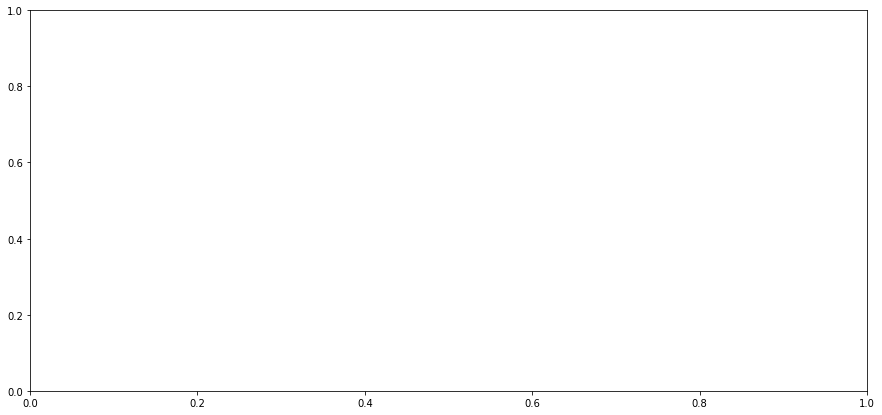

In [14]:
# Please do not create any other figure object 
student_figure = plt.figure(figsize=(15,7))

# Define parameters for Task 2 - explore frequencies up to 3000Hz

t = get_time_array(N=100000, duration = 10.0)
s_in = swept_sine(10, 2000, t)

############################################################

s_out = t3_box.process(t, s_in)

# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

# Next we generate sample points in the frequency domain,
# for this we need to know the duration and time step
# of the time array.
def get_frequency_array(t):
    N = len(t)
    timestep = np.diff(t)[0]
    f = np.fft.fftfreq(N, d=timestep)
    return f

f = get_frequency_array(t)


def get_positive_frequencies(A):
    N=len(A)
    if len(A)//2==0:
        N2=int(N/2)
    else:
        N2=int((N+1)/2)
    return A[1:N2]

f = 2*np.pi*get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)

#################################################################
a = np.abs(S_out/S_in)

index = np.argmin(np.abs(a - 1))
index1 = np.argmin(np.abs(a - 1/np.sqrt(2)))
index2 = np.argmin(np.abs(a[0:(index1-1)] - 1/np.sqrt(2)))

f_0 = f[index]
f_h = f[index1]
f_l = f[index2]
#################################################################

# Creating some custom subplots
fg, ax = student_figure.subplots(1,1, sharex=True)

# Plot the absolute values of transformed_output 

ax.plot(f, np.abs(S_out/S_in), 'k:', label='transfer function (output/input)')
ax.set_xlabel('Frequency  [Hz]')
ax.set_ylabel('|T| [V/V]')
ax.legend()

#ax[0].set_title('FFT of in- and output signals')
#ax[0].set_ylabel('|Amplitude| [V/Hz]')

ax.axvline(x=f_0)
ax.axhline(y=1,linestyle='--')

ax.axvline(x=f_l)
ax.axvline(x=f_h)
ax.axhline(y=1/np.sqrt(2), linestyle='--')

# Fine-tune figure; make subplots close to each other 
# and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)
#plt.setp(ax[0].get_xticklabels(), visible=False)
plt.semilogx()
plt.show()

# You may perform additional working, but ensure that the plot
# you wish to be marked is on student_figure defined above


In [ ]:
resonant_frequency =  f_0 # Resonant frequency in Hz
bandwidth =     f_h - f_l      # Bandwidth in Hz

## Task 4
#### Marks available:  5
For the final task you are to create your own black box function called `my_box_process(t, s_in, R, L)` that mimics the behaviour of an **RL low-pass filter** circuit of resistance `R` (Ohms) and inductance `L` (Henrys).

`t` and `s_in` will be two numpy arrays representing an input voltage signal with physical amplitude `s_in[i]` at time `t[i]`, and the function should return a numpy array containing the real output signal in the time domain.

You will need the transfer function for the RL low-pass filter circuit:
$$T(f) = \frac{1}{1+(f/f_0)j} $$ where $f_0 = R/(2\pi\,L)$.

#### Hints:
- Use `.fft` to perform an FFT on the input signal before applying the transfer function in the frequency domain. You will then need to use the `.ifft` function to represent this modulated signal in the time domain ([`ifft` in the numpy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.ifft.html)).
- You may wish to define the transfer function separately and call this within my_box_process.
- In python, `1j` is used to represent the imaginary unit.
- Make sure your function returns a physical time domain signal (i.e. real values that can change sign). The `ifft` function will return an array of complex numbers with the real part of these numbers containing the signal we are interested in.
- BTW because the input and output of your Box must be numpy arrays, you do not need to use any `for` loop in your code.

In [ ]:
# Function definition for Task 4

def get_frequency_array(t):
    N = len(t)
    timestep = np.diff(t)[0]
    f = np.fft.fftfreq(N, d=timestep)
    return f
    
def get_positive_frequencies(A):
    N=len(A)
    if len(A)//2==0:
        N2=int(N/2)
    else:
        N2=int((N+1)/2)
    return A[1:N2]
    
def transfer_function(f):
    T = 1/(1+(f/f0)*1j)
    return T



def my_box_process(t, s_in, R, L):
    f0 = R/(2*np.pi*L)
    
    #Create transfer function in frequency domain first
    f = get_frequency_array(t)
    f = get_positive_frequencies(f)
    T = transfer_function(f)
    
    #Apply transfer function to input signal, but in the frequency domain
    S_in = np.fft.fft(s_in)
    S_in = get_positive_frequencies(S_in)
    S_out = S_in*T
    
    #Produce time domain output signal using .ifft and pick out real components
    s_out = np.fft.ifft(S_out)
    s_out = np.real(s_out)
    
    return s_out


In [ ]:
# Feel free to insert additional cells for working


**N.B.** Please execute the following statement before submitting your work. It will check that you have used correct naming for the variables and functions specified in the above tasks. It will not tell you whether you have correctly defined and implemented these!

You may execute this statement as many times as required.

In [ ]:
Boxes.check()